In [1]:
 conda install -c anaconda -n tempo_env scikit-learn 


Note: you may need to restart the kernel to use updated packages.


In [2]:
 conda install -c anaconda -n tempo_env networkx 


Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx

In [1]:
# Import dependencies. I usually manage Python packages
# using conda.
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
# Define path to netCDF file to open and read
hcho_fp = './TEMPO_20130704_17h_LA1_HCHO.nc'
o3_fp = './TEMPO_20130704_17h_LA1_O3.nc'
# Open the file. I like to do it using with to guarantee
# that it will be closed after we are done reading
# netCDF files are organized in group (which can have subgroups)
# and data fields. Each group or data field can have attributes.
# The file as a whole can also have attributes that in this case
# are called global attributes. Following this example and reading
# https://unidata.github.io/netcdf4-python/ you should get some
# familiarity about how to work with them
with Dataset(hcho_fp,'r') as hcho_src, Dataset(o3_fp, 'r') as o3_src:
    # Read geolocation variables
    common_src = hcho_src


    lat = common_src['geolocation']['latitude'][:]
    lon = common_src['geolocation']['longitude'][:]
    terrain_height = common_src['geolocation']['terrain_height'][:]
   
    solar_zenith_angle = common_src['geolocation']['solar_zenith_angle'][:]
    viewing_zenith_angle = common_src['geolocation']['viewing_zenith_angle'][:]
    relative_azimuth_angle = common_src['geolocation']['relative_azimuth_angle'][:]
    
    surface_pressure = common_src['geolocation']['surface_pressure'][:]
    tropopause_pressure = common_src['geolocation']['tropopause_pressure'][:]

    hcho_gas_profile = hcho_src['support_data']['gas_profile'][:]
    o3_gas_profile = o3_src['support_data']['gas_profile'][:]

    hcho_col = hcho_src['product']['column_amount'][:]
    o3_col = o3_src['product']['column_amount'][:]

    amf_g = common_src['support_data']['amf_geometric'][:]
    albedo = common_src['support_data']['albedo'][:]
    #.filled(np.nan)

    hcho_vert_col = amf_g.filled(amf_g.mean()) * hcho_col
    o3_vert_col = amf_g.filled(amf_g.mean()) * o3_col


C:\Users\wasii\AppData\Local\Temp/ipykernel_2184/2836287315.py:28: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  hcho_gas_profile = hcho_src['support_data']['gas_profile'][:]
C:\Users\wasii\AppData\Local\Temp/ipykernel_2184/2836287315.py:28: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  hcho_gas_profile = hcho_src['support_data']['gas_profile'][:]
C:\Users\wasii\AppData\Local\Temp/ipykernel_2184/2836287315.py:29: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  o3_gas_profile = o3_src['support_data']['gas_profile'][:]
C:\Users\wasii\AppData\Local\Temp/ipykernel_2184/2836287315.py:29: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  o3_gas_profile = o3_src['support_data']['gas_profile'][:]
C:\Users\wasii\AppData\Local\Temp/ipykernel_2184/2836287315.py:34: UserWarning: WARNING: valid_max not used 

In [27]:
def norm_val(val):
    return (val - val.min())/(val.max() - val.min())
# def norm_val(val):
#     return val/val.max()

In [4]:
hcho_vert_col.shape

(20, 61)

In [29]:
# amf_g_norm = norm_val(amf_g)

# terrain_height_norm = norm_val(terrain_height)
# albedo_norm = norm_val(albedo)

# hcho_gas_profile_norm = norm_val(hcho_gas_profile)
# o3_gas_profile_norm = norm_val(o3_gas_profile)

# hcho_vert_col_norm = norm_val(hcho_vert_col)
# o3_vert_col_norm = norm_val(o3_vert_col)

# hcho_col_norm = norm_val(hcho_col)
# o3_col_norm = norm_val(o3_col)

# solar_zenith_angle_norm = norm_val(solar_zenith_angle)
# viewing_zenith_angle_norm = norm_val(viewing_zenith_angle)
# relative_azimuth_angle_norm = norm_val(relative_azimuth_angle)

# surface_pressure_norm = norm_val(surface_pressure)
# tropopause_pressure_norm = norm_val(tropopause_pressure)


In [30]:
viewing_zenith_angle.mean()

49.65958

In [31]:
#plt.imshow(hcho_col_norm)

In [32]:
#plt.imshow(o3_col_norm)

In [33]:
tropopause_pressure.var()

119.15146

In [34]:
hcho_col.var()

8.048077803694342e+30

In [35]:
o3_col.var()

3.0212243976800764e+35

In [36]:
terrain_height.var()

132956.9144174953

In [37]:
albedo.var()

0.0002579173789773072

In [38]:
tropopause_pressure.var()

119.15146

In [39]:
surface_pressure.var()

1665.1716

In [40]:
surface_pressure.var()

1665.1716

In [5]:
feature_map = np.stack((
                        # hcho_gas_profile_norm.mean(axis=1),
                        # o3_gas_profile_norm.mean(axis=1),
                        # solar_zenith_angle, 
                        #viewing_zenith_angle, 
                        #relative_azimuth_angle, 
                        surface_pressure, 
                        tropopause_pressure, 
                        terrain_height, 
                        albedo, 
                        hcho_col, 
                        o3_col
                        ), axis=-1)

# feature_map = o3_col.flatten()[:,np.newaxis]

In [6]:
X = feature_map.reshape(feature_map.shape[0] * feature_map.shape[1], feature_map.shape[2])

In [7]:
X.shape

(1220, 6)

In [263]:
X

masked_array(
  data=[[1.00039130e+03, 1.63678101e+02, 0.00000000e+00, 3.50000001e-02,
         6.96199249e+15, 6.85565463e+18],
        [1.00039124e+03, 1.63677551e+02, 0.00000000e+00, 3.50000001e-02,
         6.10338690e+15, 6.58164590e+18],
        [1.00046063e+03, 1.63676956e+02, 0.00000000e+00, 3.50000001e-02,
         8.67700880e+15, 7.19712979e+18],
        ...,
        [9.22350464e+02, 1.89979065e+02, 4.72000000e+02, 3.60000022e-02,
         6.94102684e+15, 7.37579843e+18],
        [9.19617554e+02, 1.89969879e+02, 5.46000000e+02, 3.60000022e-02,
         1.20445669e+16, 7.38604075e+18],
        [9.21893005e+02, 1.89969269e+02, 6.42000000e+02, 3.60000022e-02,
         1.31480427e+16, 7.60569848e+18]],
  mask=False,
  fill_value=1e+20)

In [ ]:
print(len(edges_to_include))

76


In [ ]:
G.number_of_nodes()

50

In [ ]:
conda env list


Note: you may need to restart the kernel to use updated packages.


(array([ 32.,  69., 126., 175., 248., 218., 195., 110.,  41.,   6.]),
 array([2.01191605e+15, 3.50865162e+15, 5.00538719e+15, 6.50212276e+15,
        7.99885834e+15, 9.49559391e+15, 1.09923295e+16, 1.24890651e+16,
        1.39858006e+16, 1.54825362e+16, 1.69792718e+16]),
 <BarContainer object of 10 artists>)

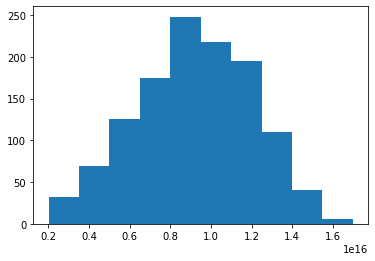

In [ ]:
#for hcho_col
plt.hist(X[:, 4])

In [9]:
data = X[:, 4]

In [172]:
data

masked_array(data=[6.96199249e+15, 6.10338690e+15, 8.67700880e+15, ...,
                   6.94102684e+15, 1.20445669e+16, 1.31480427e+16],
             mask=False,
       fill_value=1e+20)

In [ ]:
min(data)

2011916046504657.5

In [ ]:
data.mean()/1e16

0.919448628814495

0.07483677861497141


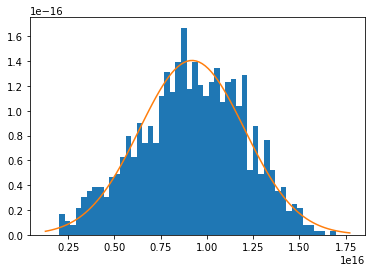

In [10]:
from scipy import stats

l, bins, patches = plt.hist(data, bins=50, density=True)

mean, var  = stats.distributions.norm.fit(data)


x = np.linspace(-5,5,100)

xmin, xmax = plt.xlim()

x = np.linspace(xmin, xmax, 100)
y = stats.distributions.norm.pdf(x, mean, var)

#plt.xticks(np.arange(data.mean() -  1 * data.var(), data.mean() + 1 * data.var(), data.var() * .1))
plt.plot(x, y)

print((data.max() - data.min())/(20 * 1e16))

In [20]:
bins.

array([2.01191605e+15, 2.31126316e+15, 2.61061028e+15, 2.90995739e+15,
       3.20930450e+15, 3.50865162e+15, 3.80799873e+15, 4.10734585e+15,
       4.40669296e+15, 4.70604008e+15, 5.00538719e+15, 5.30473431e+15,
       5.60408142e+15, 5.90342853e+15, 6.20277565e+15, 6.50212276e+15,
       6.80146988e+15, 7.10081699e+15, 7.40016411e+15, 7.69951122e+15,
       7.99885834e+15, 8.29820545e+15, 8.59755256e+15, 8.89689968e+15,
       9.19624679e+15, 9.49559391e+15, 9.79494102e+15, 1.00942881e+16,
       1.03936353e+16, 1.06929824e+16, 1.09923295e+16, 1.12916766e+16,
       1.15910237e+16, 1.18903708e+16, 1.21897179e+16, 1.24890651e+16,
       1.27884122e+16, 1.30877593e+16, 1.33871064e+16, 1.36864535e+16,
       1.39858006e+16, 1.42851477e+16, 1.45844949e+16, 1.48838420e+16,
       1.51831891e+16, 1.54825362e+16, 1.57818833e+16, 1.60812304e+16,
       1.63805775e+16, 1.66799247e+16, 1.69792718e+16])

In [18]:
(l/l.sum()).sum()

1.0000000000000002

In [258]:
l/l.sum()

array([0.00491803, 0.00327869, 0.00245902, 0.00655738, 0.00901639,
       0.01065574, 0.01147541, 0.01147541, 0.00901639, 0.01393443,
       0.0147541 , 0.01885246, 0.02377049, 0.01885246, 0.02704918,
       0.02213115, 0.02622951, 0.02213115, 0.03360656, 0.03934426,
       0.03442623, 0.04180328, 0.05      , 0.0352459 , 0.04180328,
       0.03606557, 0.03360656, 0.03688525, 0.04016393, 0.03196721,
       0.03688525, 0.03770492, 0.03114754, 0.03852459, 0.01557377,
       0.02622951, 0.0147541 , 0.02295082, 0.01557377, 0.01065574,
       0.01147541, 0.0057377 , 0.00737705, 0.00655738, 0.00245902,
       0.00245902, 0.00081967, 0.00081967, 0.        , 0.00081967])

In [245]:
bin_ticks = np.linspace(data.min(), data.max(), 50+1)

n = 2
bins = [bin_ticks[i:i+n] for i in range(0, len(bin_ticks), n)]


In [121]:
pip install pandas

In [21]:
import pandas as pd
bin_intervals = pd.IntervalIndex.from_breaks(bins)
bin_intervals

IntervalIndex([(2011916046504657.5, 2311263160964543.0], (2311263160964543.0, 2610610275424429.0], (2610610275424429.0, 2909957389884314.5], (2909957389884314.5, 3209304504344200.0], (3209304504344200.0, 3508651618804085.5] ... (1.5482536197199512e+16, 1.5781883311659396e+16], (1.5781883311659396e+16, 1.6081230426119282e+16], (1.6081230426119282e+16, 1.6380577540579168e+16], (1.6380577540579168e+16, 1.6679924655039054e+16], (1.6679924655039054e+16, 1.697927176949894e+16]], dtype='interval[float64, right]')

In [22]:
bin_pdfs = {}

for index, interval in enumerate(bin_intervals.to_tuples()):
    bin_pdfs[interval] = l[index]/l.sum()

In [25]:
sum(bin_pdfs.values())

1.0000000000000002

In [ ]:
total = 0

for interval in bin_pdfs.keys():
    total += bin_pdfs[interval] * (interval[1] - interval[0])
    print(bin_pdfs[interval] * (interval[1] - interval[0]), interval)

print(total)

In [204]:
bin_pdfs[bin_intervals[bin_intervals.contains(.9*1e16)].to_tuples()[0]] * bin_intervals[bin_intervals.contains(.9*1e16)][0].length

0.0420386494868279

In [49]:
def calc_col_weight(col):
    interval = bin_intervals[bin_intervals.contains(col[4])]
    bin_width = interval[0].length
    bin_pdf = bin_pdfs[interval.to_tuples()[0]]

    return -(bin_pdf)

In [211]:
X

masked_array(
  data=[[1.00039130e+03, 1.63678101e+02, 0.00000000e+00, 3.50000001e-02,
         6.96199249e+15, 6.85565463e+18],
        [1.00039124e+03, 1.63677551e+02, 0.00000000e+00, 3.50000001e-02,
         6.10338690e+15, 6.58164590e+18],
        [1.00046063e+03, 1.63676956e+02, 0.00000000e+00, 3.50000001e-02,
         8.67700880e+15, 7.19712979e+18],
        ...,
        [9.22350464e+02, 1.89979065e+02, 4.72000000e+02, 3.60000022e-02,
         6.94102684e+15, 7.37579843e+18],
        [9.19617554e+02, 1.89969879e+02, 5.46000000e+02, 3.60000022e-02,
         1.20445669e+16, 7.38604075e+18],
        [9.21893005e+02, 1.89969269e+02, 6.42000000e+02, 3.60000022e-02,
         1.31480427e+16, 7.60569848e+18]],
  mask=False,
  fill_value=1e+20)

In [48]:
calc_col_weight(X[800])

0.013934426229508516

In [50]:
X

masked_array(
  data=[[1.00039130e+03, 1.63678101e+02, 0.00000000e+00, 3.50000001e-02,
         6.96199249e+15, 6.85565463e+18],
        [1.00039124e+03, 1.63677551e+02, 0.00000000e+00, 3.50000001e-02,
         6.10338690e+15, 6.58164590e+18],
        [1.00046063e+03, 1.63676956e+02, 0.00000000e+00, 3.50000001e-02,
         8.67700880e+15, 7.19712979e+18],
        ...,
        [9.22350464e+02, 1.89979065e+02, 4.72000000e+02, 3.60000022e-02,
         6.94102684e+15, 7.37579843e+18],
        [9.19617554e+02, 1.89969879e+02, 5.46000000e+02, 3.60000022e-02,
         1.20445669e+16, 7.38604075e+18],
        [9.21893005e+02, 1.89969269e+02, 6.42000000e+02, 3.60000022e-02,
         1.31480427e+16, 7.60569848e+18]],
  mask=False,
  fill_value=1e+20)

In [53]:
hcho_col.shape

(20, 61)

In [ ]:
#if you want to sample 50 points, there should be at least 50 grids

#

In [64]:
x_ticks = np.linspace(1, hcho_col.shape[1], 7)
y_ticks = np.linspace(1, hcho_col.shape[0], 7)

In [65]:
y_ticks

array([ 1.        ,  4.16666667,  7.33333333, 10.5       , 13.66666667,
       16.83333333, 20.        ])

In [62]:
grid_x_intervals = pd.IntervalIndex.from_breaks(x_ticks)
grid_y_intervals = pd.IntervalIndex.from_breaks(y_ticks)

In [63]:
grid_x_intervals

IntervalIndex([(1.0, 4.157894736842105], (4.157894736842105, 7.315789473684211], (7.315789473684211, 10.473684210526315], (10.473684210526315, 13.631578947368421], (13.631578947368421, 16.789473684210527] ... (45.21052631578947, 48.36842105263158], (48.36842105263158, 51.526315789473685], (51.526315789473685, 54.68421052631579], (54.68421052631579, 57.8421052631579], (57.8421052631579, 61.0]], dtype='interval[float64, right]')

In [51]:
np.apply_along_axis(calc_col_weight, 1, X)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [173]:
calc_col_weight(X)

ValueError: operands could not be broadcast together with shapes (6,) (50,) 

In [ ]:
squarer = lambda col: bin_pdfs[bin_intervals[bin_intervals.contains(col[4])].to_tuples()[0]] * 



In [53]:
rand_col_indices = np.random.randint(X.shape[0], size = 50)

rand_cols = X[rand_col_indices, :]
rand_cols.shape

(50, 6)

In [54]:
import itertools

node_combinations = list(itertools.combinations(range(len(rand_cols)), 2))

node_combinations

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (

In [55]:
print(len(node_combinations))

1225


In [56]:
G = nx.Graph()

G.add_nodes_from(range(len(rand_cols)))

In [80]:
edges_to_include = []

for combination in node_combinations:
    node1_idx, node2_idx, = combination

    if np.abs(rand_cols[node1_idx][4] - rand_cols[node2_idx][4])/1e16 < (data.max() - data.min())/(50 * 1e16):
        edges_to_include.append(combination)

In [81]:
G.add_edges_from(edges_to_include)

In [82]:
pos = nx.random_layout(G)

In [83]:
import matplotlib.pyplot as plt

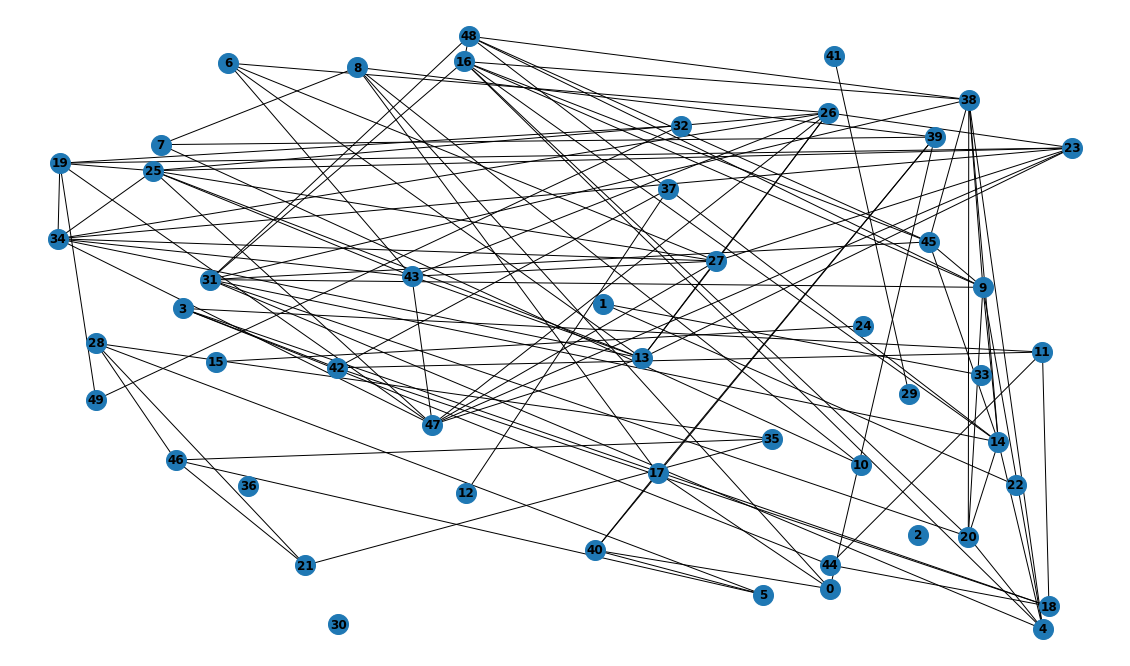

In [84]:
#subax1 = plt.subplot(122)
fig, ax = plt.subplots(figsize=(20, 12))
nx.draw(G, ax=ax, pos=pos, with_labels=True, font_weight='bold', node_size=400)

# subax2 = plt.subplot(122)
# nx.draw_shell(G, with_labels=True, font_weight='bold')

(array([ 14.,  34.,  44., 148., 290., 368., 235.,  64.,  16.,   7.]),
 array([4.55088256e+18, 4.92667969e+18, 5.30247682e+18, 5.67827395e+18,
        6.05407107e+18, 6.42986820e+18, 6.80566533e+18, 7.18146246e+18,
        7.55725959e+18, 7.93305671e+18, 8.30885384e+18]),
 <BarContainer object of 10 artists>)

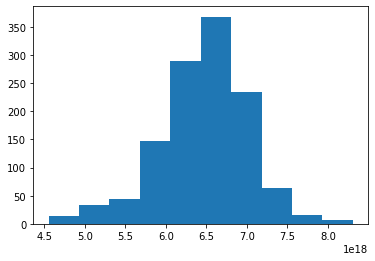

In [85]:
plt.hist(X[:, 5])

In [86]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

In [87]:
scaler.var_

array([1.66517157e+03, 1.19151457e+02, 1.32956914e+05, 2.57917379e-04,
       8.04807780e+30, 3.02122440e+35])

In [88]:
X_scaled = scaler.transform(X)

C:\Users\wasii\AppData\Local\Temp/ipykernel_24860/3103463095.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['hm', 'surf_p', 'trop_p', 'terr_h', 'albedo', 'hcho', 'o3'], minor=False)
C:\Users\wasii\AppData\Local\Temp/ipykernel_24860/3103463095.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(manual_labels, minor=False)


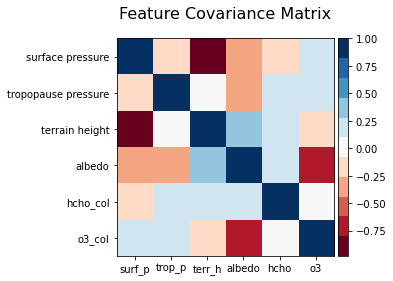

In [89]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmap = plt.get_cmap('RdBu', 11)

fig, ax = plt.subplots(1,1)
# surface_pressure, 
# tropopause_pressure, 
# terrain_height, 
# albedo, 
# hcho_col, 
# o3_col
#ax.set_xticks([0.05, 0.15, 0.5, 0.7, .9])
manual_labels = ['hm', 'surface pressure', 'tropopause pressure', 'terrain height','albedo','hcho_col', 'o3_col']

#ax.set_xticks([0.5,1.5,2.5,3.5,4.5])
ax.set_title('Feature Covariance Matrix', fontsize=16, pad=20)
ax.set_xticklabels(['hm', 'surf_p', 'trop_p', 'terr_h', 'albedo', 'hcho', 'o3'], minor=False)

#ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
ax.set_yticklabels(manual_labels, minor=False)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
#ax.set_xticklabels(['surface pressure','terrain height','albedo','hcho_col', 'o3_col'])
im = ax.imshow(np.corrcoef(X_scaled.T), cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
#plt.show()

In [90]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [91]:
np.set_printoptions(suppress=True)

print(np.array(pca.explained_variance_ratio_) * 100)

[40.64363045 25.87215415]


In [92]:
pca.components_

array([[-0.55390843, -0.0707869 ,  0.55738079,  0.48897026,  0.1247831 ,
        -0.35048334],
       [-0.34423343,  0.53833244,  0.3094743 , -0.3734178 ,  0.3030949 ,
         0.5144121 ]])

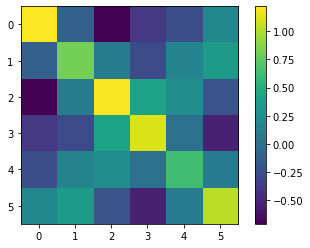

In [93]:
plt.imshow(pca.get_covariance())
plt.colorbar()

In [94]:
X_transformed = pca.transform(X)

In [95]:
X_transformed.shape

(1220, 2)

In [96]:
feature_map.shape

(20, 61, 6)

In [97]:
dim2_feature_map = X_transformed.reshape((feature_map.shape[0], feature_map.shape[1], 2))

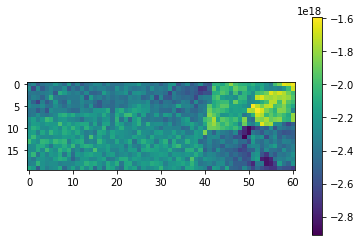

In [98]:
plt.imshow(dim2_feature_map[:, :, 0])
plt.colorbar()

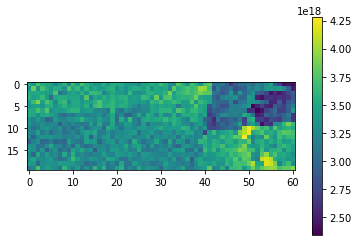

In [99]:

plt.imshow(dim2_feature_map[:, :, 1])
plt.colorbar()

In [100]:
X_transformed

array([[-2.40192398e+18,  3.52874187e+18],
       [-2.30599562e+18,  3.38752822e+18],
       [-2.52139133e+18,  3.70492064e+18],
       ...,
       [-2.58422833e+18,  3.79630378e+18],
       [-2.58718126e+18,  3.80311941e+18],
       [-2.66402994e+18,  3.91644847e+18]])

In [101]:
X_transformed[:, 0]

array([-2.40192398e+18, -2.30599562e+18, -2.52139133e+18, ...,
       -2.58422833e+18, -2.58718126e+18, -2.66402994e+18])

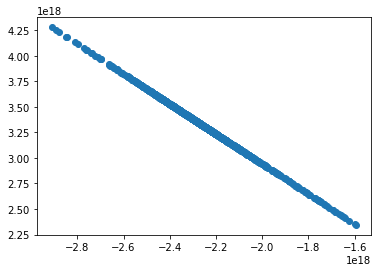

In [102]:
# plt.xlim([-4.5e17, 4e17])
# plt.ylim([-3.50e18, -3.25e18])
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])